In [1]:
# PROJECT SISTEM CERDAS | MTI 2023 Genap
# Alza Syauqi Billah Ghifari
# 23/528902/PTK/15592

In [2]:
# pandas:                  for data manipulation and analysis
# sklearn/scikit-learn:    for implementing machine learning models, preprocessing, and evaluate performance
# matplotlib/seaborn:      for visualizing results like confusion matrix

import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

warnings.filterwarnings("ignore")

In [4]:
# function to create label on bar chart
def bar_labels(axes, rotation=0, location="edge"):
    for container in axes.containers:
        axes.bar_label(container, label_type=location, rotation=rotation)
    axes.set_yticklabels(())
    axes.set_xlabel("")
    axes.set_ylabel("")

In [5]:
models = [
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    SVC(),
    XGBClassifier(),
    LGBMClassifier(verbose=-100)     # verbose -100 for controlling output, skipping unnecessary output log
]

names = [
    "Random Forest",
    "Gradient Boosting", 
    "Logistic Regression",
    "Support Vector Machine",
    "XGBoost",
    "LightGBM"
]

In [6]:
# main function to train model and evaluate performance
def training(x_train, y_train, x_test, y_test):
    scores, reports, cms = [], dict(), dict()
    
    for model, name in zip(models, names):
        model.fit(x_train, y_train)
        pred = model.predict(x_test)
        scores.append(accuracy_score(pred, y_test) * 100)
        reports[name] = classification_report(pred, y_test)
        cms[name] = confusion_matrix(pred, y_test)
        
    results = pd.DataFrame({"score": scores}, index=names)
    results = results.sort_values("score", ascending=False)
    results["score"] = round(results["score"], 2)
    
    fig, ax = plt.subplots()
    results["score"].plot(kind="bar", ax=ax)
    bar_labels(ax)
    plt.tight_layout()
    plt.show()
    
    index = 0
    # search proper ncols for dynamic used algorithm model
    half_length = len(models) // 2 + 1 if len(models) % 2 != 0 else len(models) // 2

    for _ in range(2):
        fig, axes = plt.subplots(ncols=half_length, figsize=(15, 6))
        for i in range(half_length):
            sns.heatmap(cms[results.index[index]], annot=True, fmt='d', ax=axes[i])
            axes[i].set_title(f"{results.index[index]}: {results.iloc[index, 0]}%")
            index += 1
        plt.tight_layout()
        plt.show()
        
    for name, report in reports.items():
        print("*" * 30)
        print(name)
        print(report)
        print("\n\n")

In [7]:
df = pd.read_csv('../../../../ml/datasets/career_change_prediction_dataset/career_change_prediction_dataset.csv')
df["Family Influence"].fillna(df["Family Influence"].mode()[0], inplace=True)

# target_distribution = df['Likely to Change Occupation'].value_counts(normalize=True)
# print(target_distribution)

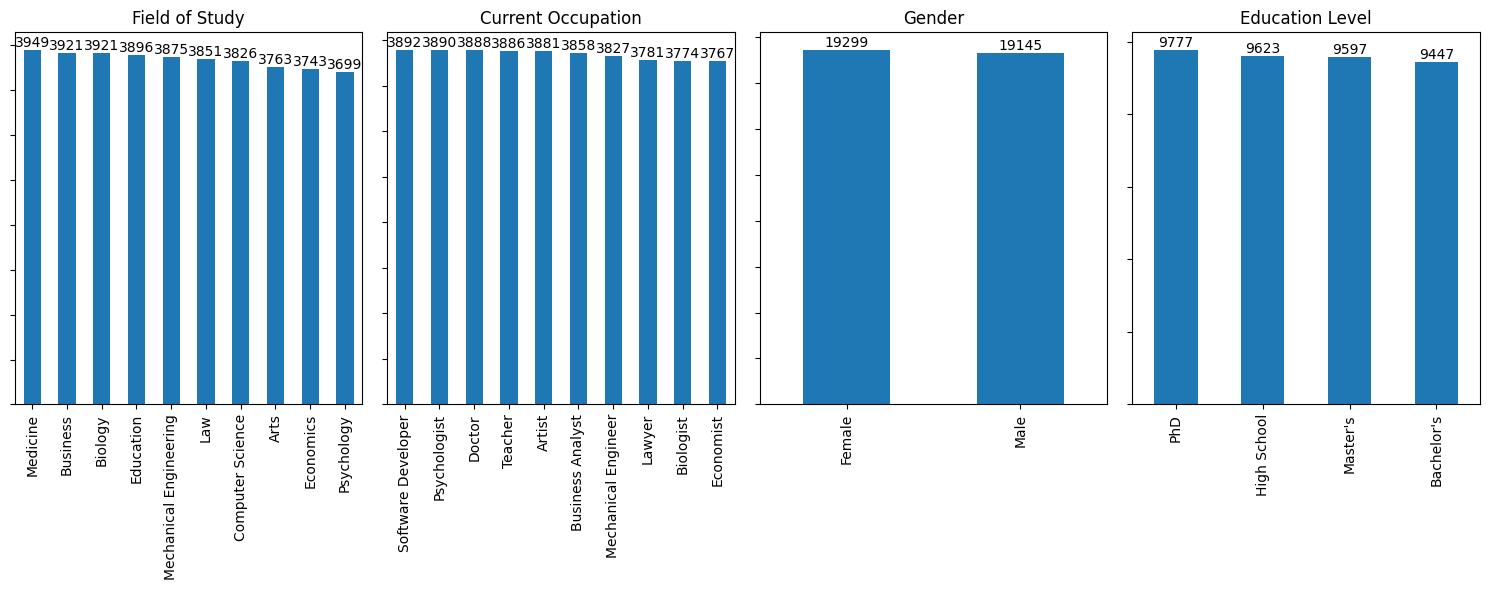

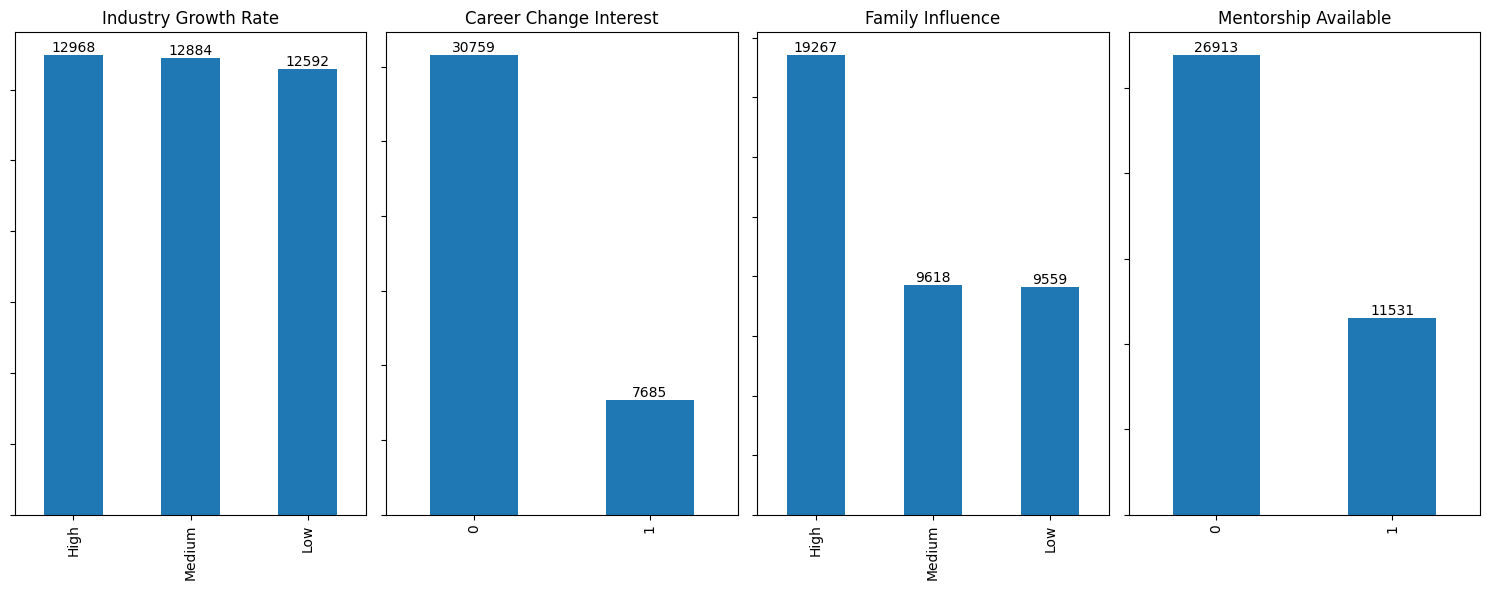

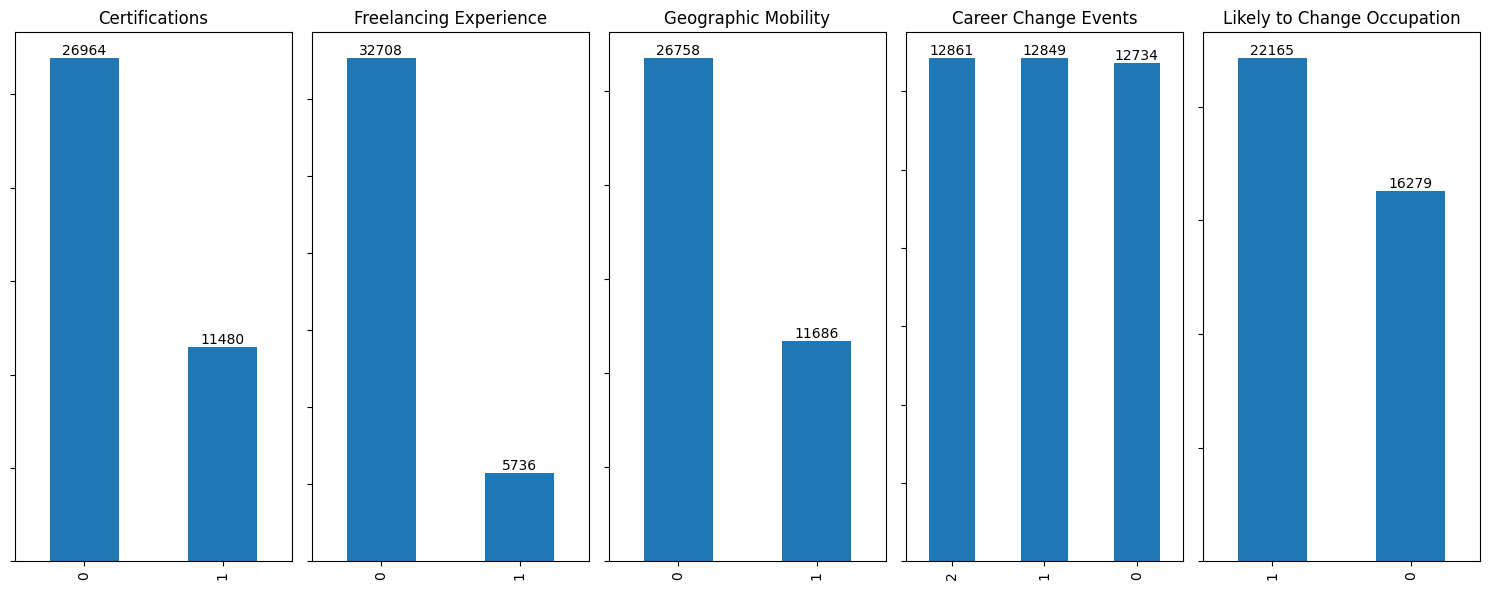

In [8]:
cats = [i for i in df.columns if df[i].nunique() <= 4]
cats = ["Field of Study", "Current Occupation"] + cats
nums = [i for i in df.columns if i not in cats]

index = 0

for _ in range(3):
    n = 4
    if _ == 2:
        n += 1
    fig, axes = plt.subplots(ncols=n, figsize=(15, 6))
    for i in range(n):
        df[cats[index]].value_counts().plot(kind="bar", ax=axes[i])
        bar_labels(axes[i])
        axes[i].set_title(cats[index])
        index += 1
    plt.tight_layout()
    plt.show()

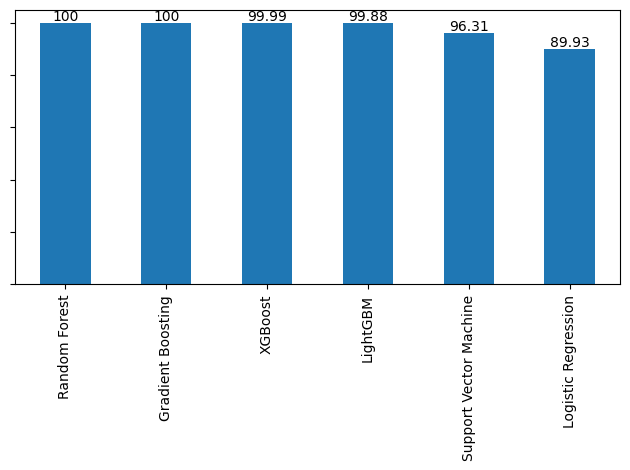

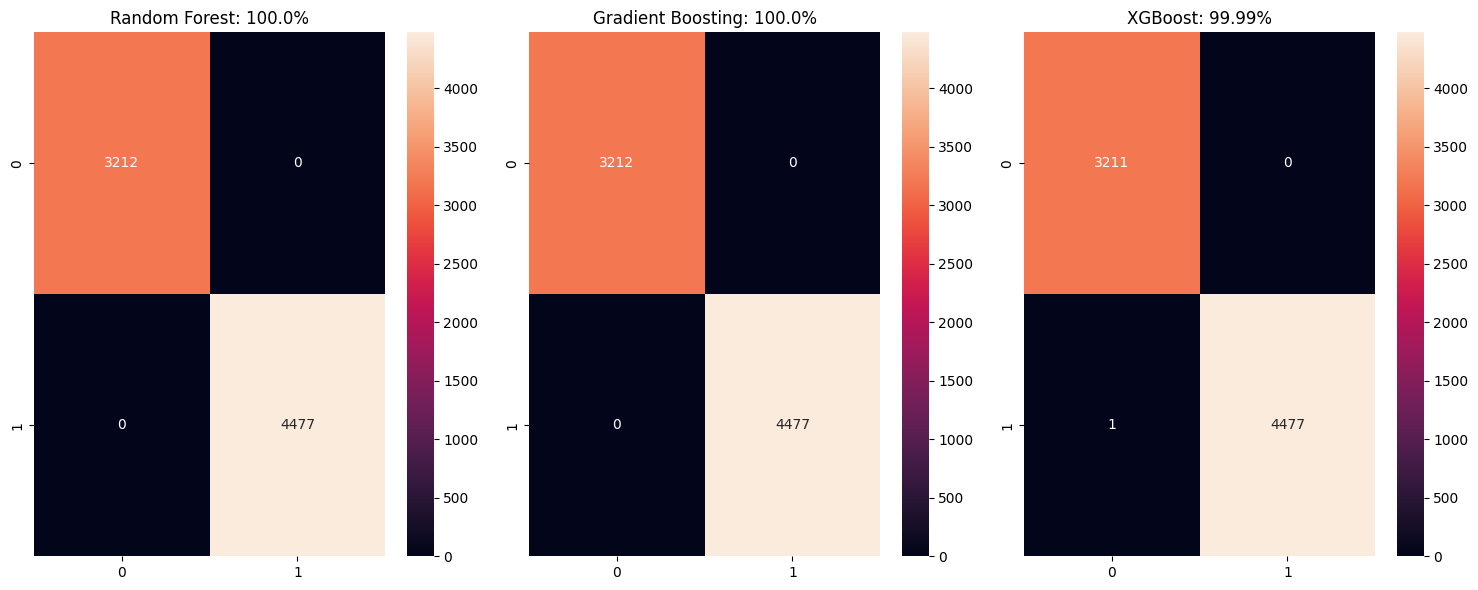

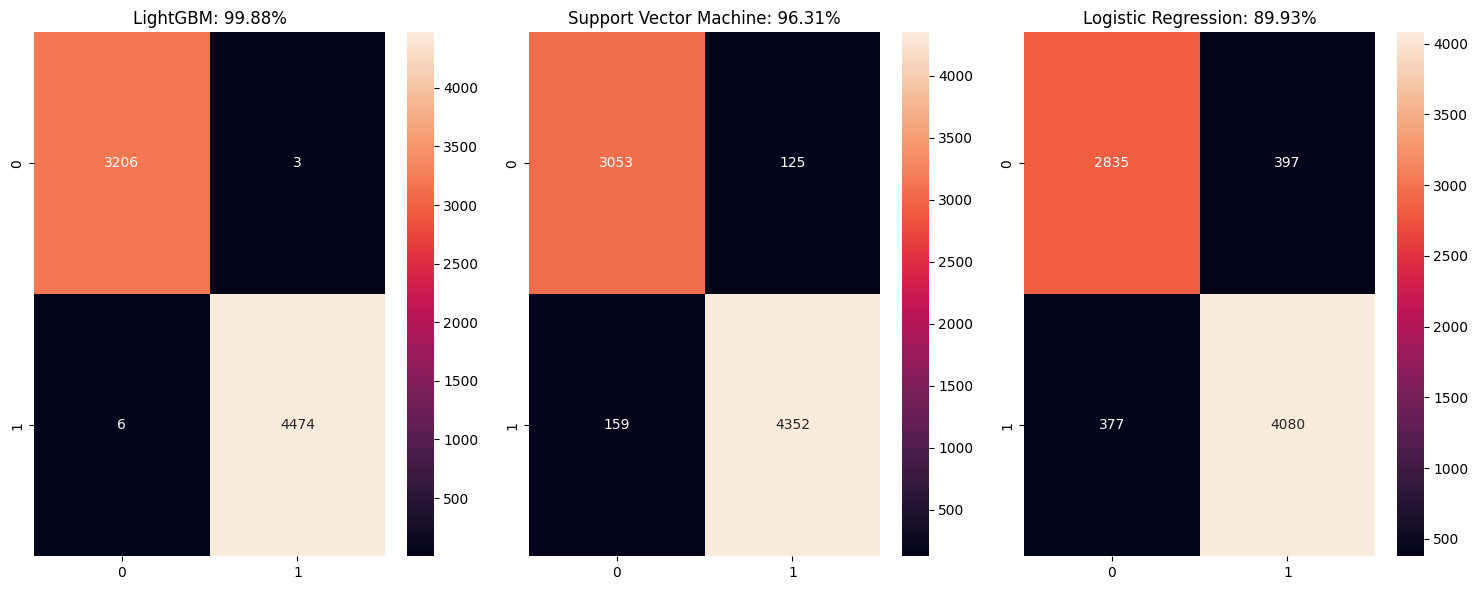

******************************
Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3212
           1       1.00      1.00      1.00      4477

    accuracy                           1.00      7689
   macro avg       1.00      1.00      1.00      7689
weighted avg       1.00      1.00      1.00      7689




******************************
Gradient Boosting
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3212
           1       1.00      1.00      1.00      4477

    accuracy                           1.00      7689
   macro avg       1.00      1.00      1.00      7689
weighted avg       1.00      1.00      1.00      7689




******************************
Logistic Regression
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      3232
           1       0.91      0.92      0.91      4457

    accuracy                   

In [9]:
for i in cats[:-1]:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i].values)

scaler = MinMaxScaler()

x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

training(x_train, y_train, x_test, y_test)